beta = 0
N = 100
numsamples = 20000

Kernel Perceptron Summary
Number of support vectors for k: 13
process time (s): 0.98481


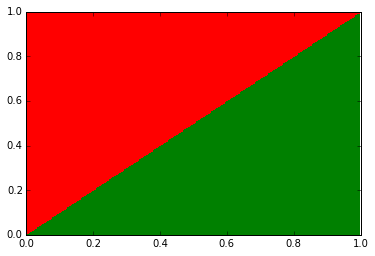

Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
process time (s): 9.364486


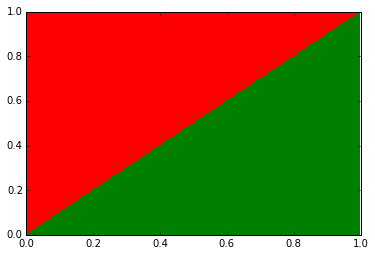

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 98
k prop predicted correctly = 1.0
Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
bk prop predicted correctly = 0.999939263263


In [3]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0
N = 100
numsamples = 20000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = 0
N = 200
numsamples = 20000

Kernel Perceptron Summary
Number of support vectors for k: 184
process time (s): 6.807833


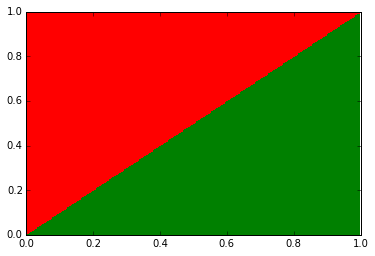

Budget Kernel Perceptron Summary
Number of support vectors for bk: 200
process time (s): 19.112219


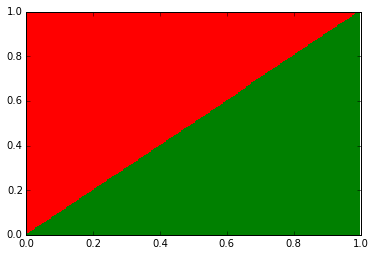

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 60
k prop predicted correctly = 1.0
Budget Kernel Perceptron Summary
Number of support vectors for bk: 189
bk prop predicted correctly = 1.0


In [4]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0
N = 200
numsamples = 20000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = 0
N = 500
numsamples = 20000

Kernel Perceptron Summary
Number of support vectors for k: 212
process time (s): 8.086729


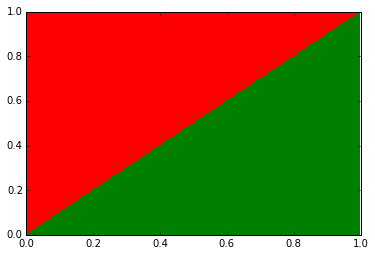

Budget Kernel Perceptron Summary
Number of support vectors for bk: 70
process time (s): 6.900058


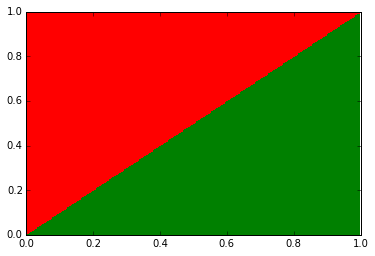

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 137
k prop predicted correctly = 1.0
Budget Kernel Perceptron Summary
Number of support vectors for bk: 174
bk prop predicted correctly = 1.0


In [5]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0
N = 500
numsamples = 20000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = 0
N = 100
numsamples = 10000

Kernel Perceptron Summary
Number of support vectors for k: 158
process time (s): 3.531878


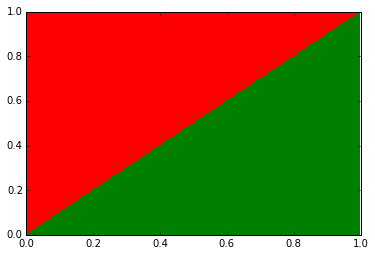

Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
process time (s): 4.804197


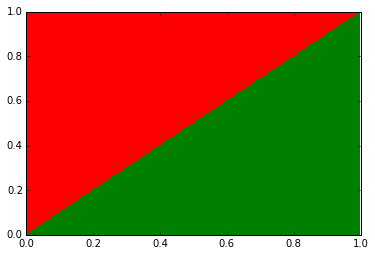

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 186
k prop predicted correctly = 0.999878526527
Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
bk prop predicted correctly = 0.962039539616


In [6]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0
N = 100
numsamples = 10000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = 0
N = 100
numsamples = 30000

Kernel Perceptron Summary
Number of support vectors for k: 103
process time (s): 8.50177


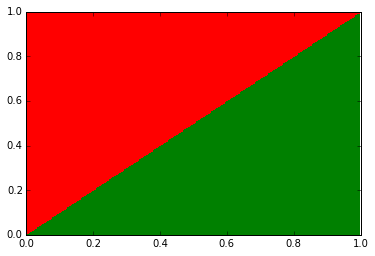

Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
process time (s): 15.577188


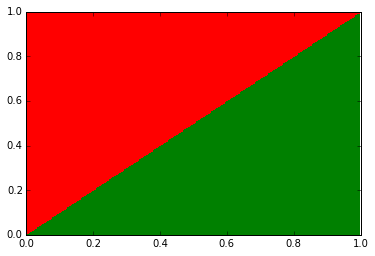

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 108
k prop predicted correctly = 1.0
Budget Kernel Perceptron Summary
Number of support vectors for bk: 51
bk prop predicted correctly = 1.0


In [7]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0
N = 100
numsamples = 30000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = 0
N = 100
numsamples = 50000

Kernel Perceptron Summary
Number of support vectors for k: 200
process time (s): 23.909554


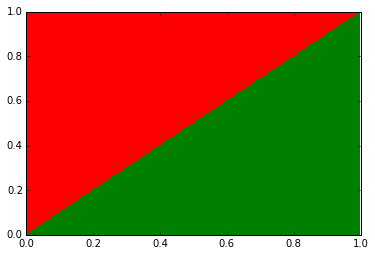

Budget Kernel Perceptron Summary
Number of support vectors for bk: 99
process time (s): 25.03202


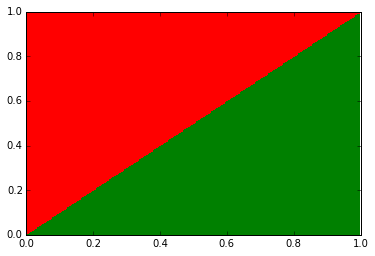

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 143
k prop predicted correctly = 1.0
Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
bk prop predicted correctly = 0.987579337362


In [8]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0
N = 100
numsamples = 50000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = .5
n = 100
numsamples = 20000

Kernel Perceptron Summary
Number of support vectors for k: 87
process time (s): 5.084028


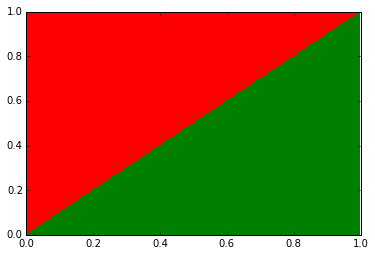

Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
process time (s): 10.82751


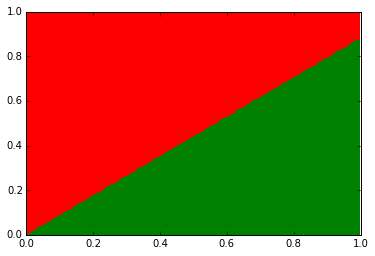

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 140
k prop predicted correctly = 1.0
Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
bk prop predicted correctly = 0.980655349388


In [9]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0.5
N = 100
numsamples = 20000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = 0.05
n = 100
nusamples = 20000

Kernel Perceptron Summary
Number of support vectors for k: 231
process time (s): 8.934602


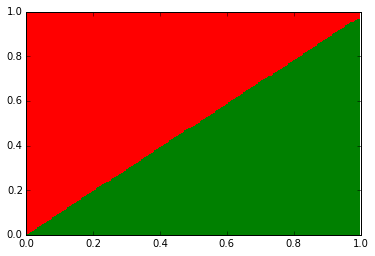

Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
process time (s): 10.938737


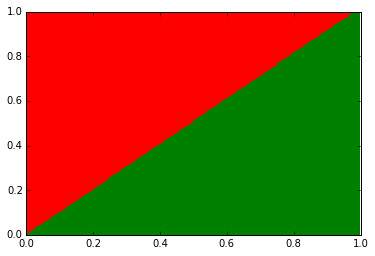

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 83
k prop predicted correctly = 0.999939263263
Budget Kernel Perceptron Summary
Number of support vectors for bk: 100
bk prop predicted correctly = 0.992134592608


In [10]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0.05
N = 100
numsamples = 20000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = -0.05
n = 100
numsamples = 20000

Kernel Perceptron Summary
Number of support vectors for k: 280
process time (s): 9.548529


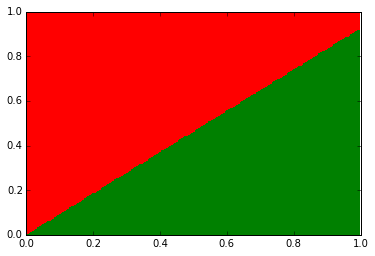

Budget Kernel Perceptron Summary
Number of support vectors for bk: 0
process time (s): 0.268766


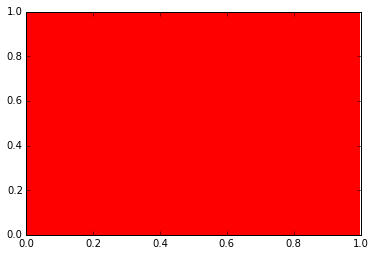

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 103
k prop predicted correctly = 1.0
Budget Kernel Perceptron Summary
Number of support vectors for bk: 0
bk prop predicted correctly = 0.0


In [11]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = -0.05
N = 100
numsamples = 20000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = 0.05
n = 200
numsamples = 10000

Kernel Perceptron Summary
Number of support vectors for k: 236
process time (s): 4.174034


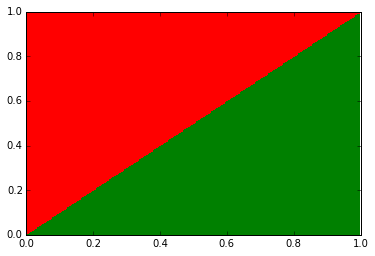

Budget Kernel Perceptron Summary
Number of support vectors for bk: 200
process time (s): 8.645547


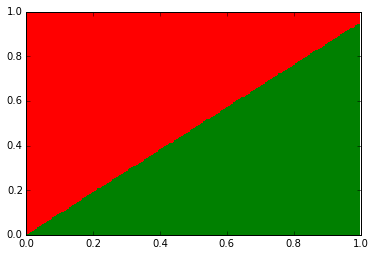

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 219
k prop predicted correctly = 0.985696498527
Budget Kernel Perceptron Summary
Number of support vectors for bk: 200
bk prop predicted correctly = 0.971241155213


In [12]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0.05
N = 200
numsamples = 10000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

beta = 0.05
n = 500
numsamples = 10000

Kernel Perceptron Summary
Number of support vectors for k: 138
process time (s): 3.240456


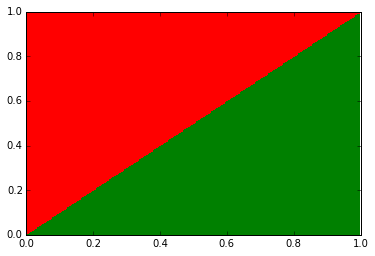

Budget Kernel Perceptron Summary
Number of support vectors for bk: 406
process time (s): 11.599665


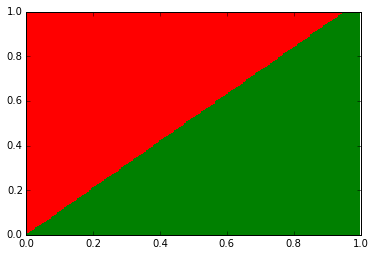

Accuracy calculations:
Kernel Perceptron Summary
Number of support vectors for k: 139
k prop predicted correctly = 0.999939263263
Budget Kernel Perceptron Summary
Number of support vectors for bk: 399
bk prop predicted correctly = 0.98618239242


In [13]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random as random
import time
from sklearn.cross_validation import train_test_split
from Perceptron import Perceptron
%matplotlib inline

# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
        
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # create initial set S of support vectors
        
        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,X[i]) # note that i[2] is alpha_i and i[0] is x_i

            if y_t*yhat_t <= 0: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t
        
        print "Kernel Perceptron Summary"
        print "Number of support vectors for k:", len(S)
        self.A = A
        self.S = S

    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)

# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples

        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        assert(X.shape[0] == Y.shape[0])
    
        sample_indices = range(X.shape[0]) # for use in random sampling
        A = np.zeros(X.shape[0]) # create initial set of alpha values
        S = set() # need to be set?

        predictions = np.zeros(X.shape[0])

        for sim in range(self.numsamples):
            t = random.sample(sample_indices, 1) # pick random sample from training data and write x, y, and t
            x_t = X[t] # shape is (1,2)
            y_t = Y[t]
            a_t = A[t]

            yhat_t = 0 # initialize yhat_t to 0 to begin the sum
            for i in S: # sum over support vectors to update yhat_t
                yhat_t += A[i]*np.dot(x_t,np.transpose(X[i])) # note that i[2] is alpha_i and i[0] is x_i
                predictions[t] = yhat_t

            if y_t*yhat_t <= self.beta: # check condition. if true update set of support vectors and a_t
                S.add(t[0])
                A[t] = y_t

                if len(S) > self.N:
                    budgets = []
                    ts = []
                    for i in S:
                        budgets.append(Y[i]*(predictions[i]-A[i]*np.dot(X[i],X[i].T)))
                        ts.append(i)
                    index_to_remove = np.argmax(budgets)
                    S.remove(ts[index_to_remove]) # delete support vector w/ largest budget value
        
        print "Budget Kernel Perceptron Summary"
        print "Number of support vectors for bk:", len(S)
        self.A = A
        self.S = S
    
    def predict(self,X):
        X_full = self.X
        A = self.A
        S = self.S
        predictions = np.zeros(X.shape[0])
        
        for t in range(X.shape[0]):
            for i in S:
                predictions[t] += A[i]*np.dot(X[t],X_full[i])

        return np.sign(predictions)



# Do not change these three lines.
data = np.loadtxt("data.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
beta = 0.05
N = 500
numsamples = 10000

kernel_file_name = 'k.png'
budget_kernel_file_name = 'bk.png'

# Don't change things below this in your final version. Note that you can use the parameters above to generate multiple graphs if you want to include them in your writeup.
k = KernelPerceptron(numsamples)
t0 = time.clock()
k.fit(X,Y)
print "process time (s):", time.clock() - t0 
k.visualize(kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

bk = BudgetKernelPerceptron(beta, N, numsamples)
t1 = time.clock()
bk.fit(X, Y)
print "process time (s):", time.clock() - t1
bk.visualize(budget_kernel_file_name, width=0, show_charts=True, save_fig=True, include_points=False)

# Testing the accuracy
print "Accuracy calculations:"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

k.fit(X_train, Y_train)
test_predictions = k.predict(X_test)
print "k prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]

bk.fit(X_train, Y_train)
test_predictions = bk.predict(X_test)
print "bk prop predicted correctly =",np.equal(test_predictions,Y_test).sum().astype('float64')/test_predictions.shape[0]